In [3]:
from stravalib import Client

client_id = '33024' 
client = Client()

url = client.authorization_url(
    client_id=client_id,
    redirect_uri='http://localhost/'
)

print(url)

https://www.strava.com/oauth/authorize?client_id=33024&redirect_uri=http%3A%2F%2Flocalhost%2F&approval_prompt=auto&response_type=code&scope=read%2Cactivity%3Aread


In [4]:
client_secret="18c6b793c2eb0152ce85fa2bb3f7d706165d396f"

code = '8c0e32277dfa9e569770b598b2797685bb945a49' # Change this to what you see
access_token = client.exchange_code_for_token(
    client_id=client_id,
    client_secret=client_secret,
    code=code
)
refresh_token = access_token['access_token']
client = Client(access_token=refresh_token)# Test the connection
athlete = client.get_athlete()
print(f'Hello, {athlete.firstname}, I know you.')



Hello, Mick, I know you.


In [5]:
import pandas as pd
from stravalib import unithelper

from datetime import datetime


#making a pandas dataframe
runs_2019 = pd.DataFrame(
    columns=[
        'date', 
        'activity_id', 
        'moving_time',
        'distance'
    ]
)

rides_2019 = pd.DataFrame(
    columns=[
        'date', 
        'activity_id', 
        'moving_time',
        'distance'
    ]
)

today = now = datetime.now()


for activity in client.get_activities(
    after="2019-01-01T00:00:00Z",
    before=today
    ):
    if activity.type == 'Run':
        runs_2019 = runs_2019.append(
            {
                'date': activity.start_date_local.date(),
                'activity_id': activity.id, 
                'moving_time': activity.moving_time, 
                'distance': activity.distance.num * 0.000621371
            }, 
            ignore_index=True
        )
    elif activity.type == 'Ride':
        rides_2019 = rides_2019.append(
            {
                'date': activity.start_date_local.date(),
                'activity_id': activity.id, 
                'moving_time': activity.moving_time, 
                'distance': activity.distance.num * 0.000621371
            }, 
            ignore_index=True
        )
        
#runs_2019.head(100)
#rides_2019.head(100)
print('Done loading')



Done loading


In [6]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


working_runs = runs_2019
working_rides = rides_2019

#I think this is the way - c
working_runs.index = pd.to_datetime(working_runs.date)
working_rides.index = pd.to_datetime(working_rides.date)

#make a series which is the weekly total
summed_runs = working_runs['distance'].resample('W').sum()
summed_rides = working_rides['distance'].resample('W').sum()

print('Done summing')
summed_runs


Done summing


date
2019-01-06     7.094814
2019-01-13    12.731270
2019-01-20    10.762146
2019-01-27     5.954598
2019-02-03     0.000000
2019-02-10     3.340490
2019-02-17     1.850443
2019-02-24     8.115727
2019-03-03     4.033941
2019-03-10     5.038697
2019-03-17     0.871162
2019-03-24     0.000000
2019-03-31     0.987359
2019-04-07     0.000000
2019-04-14     0.000000
2019-04-21     0.000000
2019-04-28     0.000000
2019-05-05     0.000000
2019-05-12     0.000000
2019-05-19     0.000000
2019-05-26     0.000000
2019-06-02     0.912545
2019-06-09     1.001215
2019-06-16     1.016439
2019-06-23     1.870389
2019-06-30     1.849449
2019-07-07     1.869208
2019-07-14     0.000000
2019-07-21     2.473367
2019-07-28     2.449569
2019-08-04     2.483682
2019-08-11     3.373982
2019-08-18     3.442520
2019-08-25     5.431031
2019-09-01     1.847398
2019-09-08     4.129942
2019-09-15     4.113725
2019-09-22     4.128575
2019-09-29     0.000000
2019-10-06     4.141500
2019-10-13     5.068834
2019-10-20 

c:\users\mick.byrne\.virtualenvs\strava-s3gbek3g\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
c:\users\mick.byrne\.virtualenvs\strava-s3gbek3g\lib\site-packages\matplotlib\axes\_axes.py:2179: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  dx = [convert(x0 + ddx) - x for ddx in dx]


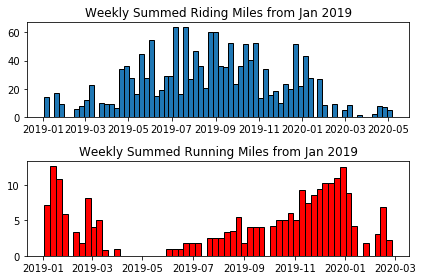

In [7]:



fig, axs = plt.subplots(2)
#fig, (ax1, ax2) = plt.subplots(2, sharex=True)
#fig = Figure, ax ndarray[2]
fig.suptitle('')
             

axs[0].bar(summed_rides.index,summed_rides,width=1,edgecolor='black')
axs[1].bar(summed_runs.index,summed_runs,width=1,color='red',edgecolor='black')





axs[0].set_title('Weekly Summed Riding Miles from Jan 2019')
axs[1].set_title('Weekly Summed Running Miles from Jan 2019')
fig.tight_layout()

plt.savefig('weekly.png',dpi=240)


plt.show()







#DRY this up
#different scale for rides
#annual stats
#running miles
#riding miles
#average ride
#min
#max
#time - longest
#pace


#somehoe be good to measure the rate of increase
